# Image Classification using SVM Classifier


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/cat-and-dog


In [6]:
import os

# List files in the downloaded path
for file in os.listdir(path):
    print(file)


test_set
training_set


In [15]:
import os

# Go inside the subfolder
testing_path = os.path.join(path, "test_set")
training_path = os.path.join(path,"training_set")

test_path = os.path.join(testing_path,"test_set")
train_path = os.path.join(training_path,"training_set")

In [17]:
for files in os.listdir(train_path):
  print(files)
for files in os.listdir(test_path):
  print(files)

dogs
cats
dogs
cats


In [19]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                  zoom_range=0.2,
                                   horizontal_flip=True)

In [21]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary'
                                                 )

Found 8005 images belonging to 2 classes.


In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 2023 images belonging to 2 classes.


In [28]:
  from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.regularizers import l2

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2

model = Sequential()

# First Conv-Pool Layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second Conv-Pool Layer
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(units=128, activation='relu'))

# Output Layer
model.add(Dense(units=1, kernel_regularizer=l2(0.01), activation='linear'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058,977 (4.04 MB)

 Trainable params: 1,058,977 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='hinge',metrics=['accuracy'])
r = model.fit(x=training_set,validation_data=test_set,epochs=15)


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 65s 252ms/step - accuracy: 0.7933 - loss: 0.4443 - val_accuracy: 0.7939 - val_loss: 0.4947
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 0.8042 - loss: 0.4248 - val_accuracy: 0.7924 - val_loss: 0.4952
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 63s 252ms/step - accuracy: 0.8005 - loss: 0.4307 - val_accuracy: 0.7954 - val_loss: 0.5017
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 262ms/step - accuracy: 0.8091 - loss: 0.4256 - val_accuracy: 0.8097 - val_loss: 0.4901
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 264ms/step - accuracy: 0.8073 - loss: 0.4173 - val_accuracy: 0.8038 - val_loss: 0.4841
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 254ms/step - accuracy: 0.8260 - loss: 0.3885 - val_accuracy: 0.7993 - val_loss: 0.4771
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 62s 245ms/step - accuracy: 0.8149 - loss: 0.4025 - val_accuracy: 0.8112 - val_loss: 0.4709
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 262ms/step - accuracy: 0.8294 - loss: 0

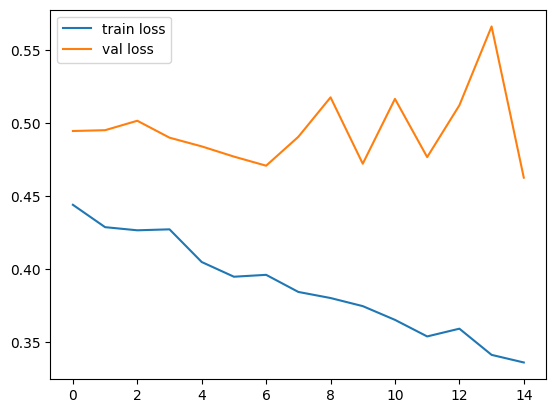

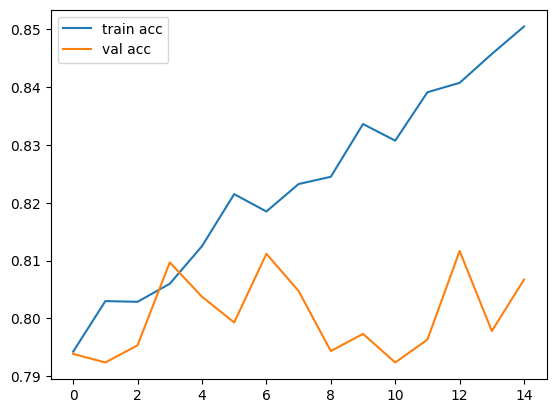

<Figure size 640x480 with 0 Axes>

In [47]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [49]:
from tensorflow.keras.models import load_model

model.save('model_rcat_dog.h5')

In [50]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_rcat_dog.h5')

In [51]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058,979 (4.04 MB)

 Trainable params: 1,058,977 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [55]:

# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(test_path+'/dogs/dog.4015.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [56]:
result

array([[3.394168]], dtype=float32)

In [63]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img(test_path+'/cats/cat.4018.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [64]:
result

array([[-0.5589815]], dtype=float32)

In [65]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is cat
